<center>
# Photoelectric Experiment Lab Notebook

## Adithya Shastry
## April 4th, 2020
<center>

This is the analysis of the very famous experiment by Robert Millikan where he set out to understand the true nature of light. Three different experiments were conducted to analyze the different characteristics of photons. These experiments utilized a high pressure mercury lamp as the light source for the experiments and emitted a 253.7 nm ultraviolet wavelength. The experiments will be analyzed below. 

## Photocurrent versus anode voltage

Here we will be looking at the data from the first experiment to understand the some interesting things about the particle like behavior of light. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the excel file from the file folder. 
#I have separated the two sets of data into different sheets to make 
#it easier to import
anodeV174=pd.read_excel(
    "PhotoCurrent-AnodeVoltage Data 2020-03-19.xlsx",
    skiprows=[0],sheetname="Sheet1")

anodeV174.columns=['Anode Voltage(V)','Cathode Current(10^-7 A)']


#Now import the new file
anodeV214=pd.read_excel(
    "PhotoCurrent-AnodeVoltage Data 2020-03-19.xlsx",
    skiprows=[0],sheetname='Sheet2')

anodeV214.columns=columns=['Anode Voltage(V)','Cathode Current(10^-7 A)']
anodeV174.head(10)

,Anode Voltage(V),Cathode Current(10^-7 A)
0,0.00,0.10650
1,-0.10,0.09200
2,-0.20,0.07880
3,-0.35,0.05920
4,-0.40,0.04170
5,-0.65,0.02650
6,-0.80,0.01390
7,-0.95,0.00545
8,-1.10,0.00137
9,-1.20,0.00023


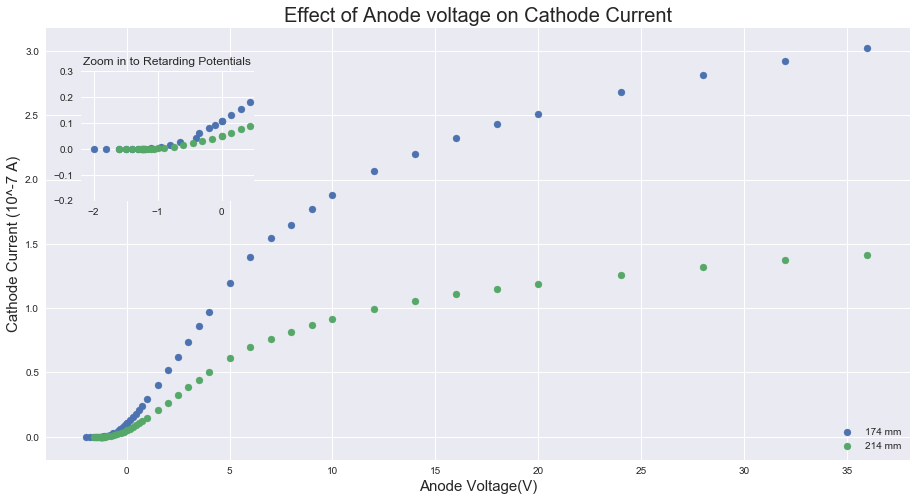

In [3]:
#Now I will make a quick plot of this data
fig=plt.figure(figsize=(12,6))


ax1=fig.add_axes([0,0,1,1])
ax1.set_xlabel("Anode Voltage(V)",fontsize=15)
ax1.set_ylabel("Cathode Current (10^-7 A)",fontsize=15)
ax1.scatter(anodeV174['Anode Voltage(V)'],
            anodeV174['Cathode Current(10^-7 A)'],
            label='174 mm',
            linestyle='-')

ax1.scatter(anodeV214['Anode Voltage(V)'],
            anodeV214['Cathode Current(10^-7 A)'],
            label='214 mm',
            linestyle='-')

ax1.legend(loc=4)
ax1.set_title("Effect of Anode voltage on Cathode Current",fontsize=20)

ax2=fig.add_axes([0.04,0.6,0.2,0.3])

ax2.set_ylim([-0.2,0.3])

ax2.set_xlim([-2.2,0.5])

ax2.scatter(anodeV174['Anode Voltage(V)'],
            anodeV174['Cathode Current(10^-7 A)'],
            label='174 mm',
            linestyle='-')

ax2.scatter(anodeV214['Anode Voltage(V)'],
            anodeV214['Cathode Current(10^-7 A)'],
            label='214 mm',
            linestyle='-')
ax2.set_title("Zoom in to Retarding Potentials")

It is clearly seen from the graph above that that the stopping potential is the same for all intensities of light. This shows that the photons of light are acting like a particle instead of like a wave. If the light was indeed acting like a wave then the curve for the 174 mm light should have a more negative stopping potential, however it does not showing that this model for how light works is indeed incorrect in this context, leading to the prevailing theory of particle wave duality. This also shows that only one photon of light will interact with an electron and put it into an excited state, otherwise we would see a   more negative stopping potential for the 174 mm light. From this we can also determine that the light delivers energy in fixed quantities to the electrons. 

## Photocurrent versus Light Intensity

In this experiment we will delve deeper into the ideas proposed above by looking at how the intensity of light affects the photocurrent. This data was taken with a anode voltage of 25 V. The distance was adjusted in accordance with a 25% to 30% photocurrent reduction every increment.

In [4]:
lightIn=pd.read_excel(
    'PhotoCurrent-Distance Data 2020-03-19.xlsx',
    skiprows=[0,1,2,3,4])

lightIn.columns=['Xm(mm)','Photocurrent (10^-7 A)']
# Create a column with Sqrt(I)
lightIn['1/Sqrt(I)']=(1/np.sqrt(
    lightIn['Photocurrent (10^-7 A)']))

lightIn.head(10)








,Xm(mm),Photocurrent (10^-7 A),1/Sqrt(I)
0,174,2.7500,0.603023
1,185,2.1300,0.685189
2,195,1.8300,0.739221
3,210,1.3410,0.863546
4,235,0.9130,1.046561
5,290,0.4530,1.485768
6,370,0.2190,2.136869
7,500,0.0992,3.175003
8,620,0.0585,4.134491
9,740,0.0383,5.109761


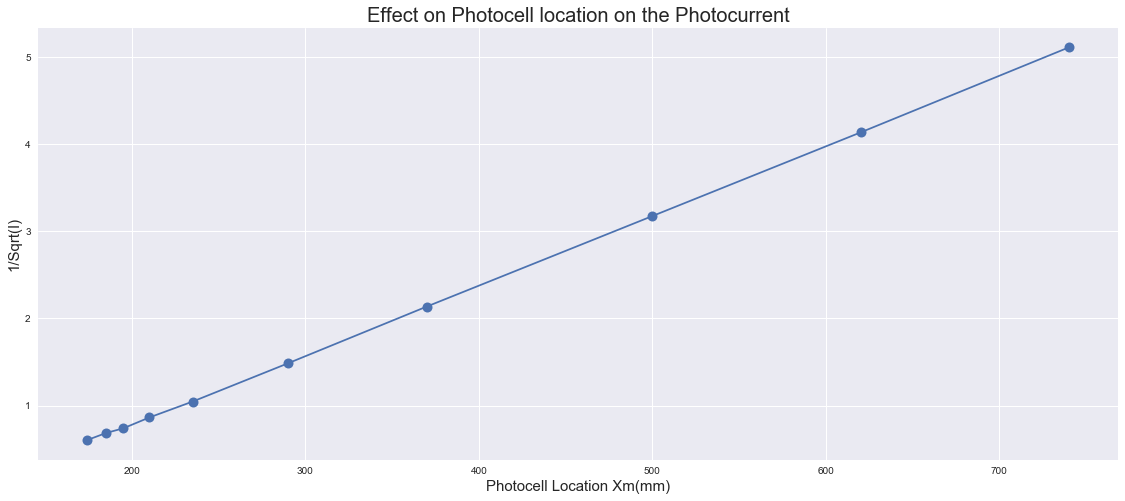

In [5]:
#Make a plot of the data 
fig1=plt.figure(figsize=(15,6))

ax=fig1.add_axes((0,0,1,1))

ax.plot(lightIn['Xm(mm)'],lightIn['1/Sqrt(I)'],marker='.',ms=20)

ax.set_ylabel("1/Sqrt(I)",fontsize=15)

ax.set_xlabel("Photocell Location Xm(mm)",fontsize=15)
ax.set_title("Effect on Photocell location on the Photocurrent"
             ,fontsize=20)



In [6]:
#Now we can do a linear regression to find the values we want to find
# I will create a function that I can call again throughout the experiment

def linearRegression(x,y):
    '''this function will take as an input two 1D numpy arrays and
    will output the linear regression model with errors.'''
    #First we will calculate X,Z,N,Y,B
    N=x.size
    
    Z=(x**2).sum()
    X=x.sum()
    Y=y.sum()
    B=(x*y).sum()
    delta=(N*Z)-(X**2)
    
    #Now calculate m and b
    m=(N*B-X*Y)/delta
    b=(Z*Y-X*B)/delta
    
    #now calculate the errors
    predicts=m*x+b
    
    errorSquared=(y-predicts)**2
    errorSquaredSum=errorSquared.sum()
    sigmaSquared=errorSquaredSum/N
    
    m_error=np.sqrt((N*sigmaSquared)/delta)
    b_error=np.sqrt((Z*sigmaSquared)/delta)
    return m,b,m_error,b_error
    
    
#Test this on the PH141 data set

degrees=np.array([20,30,40,45,50,60,70,80])
sin2theta=np.sin(2*(np.pi/180)*degrees)
y=np.array([1.27,1.85,2.12,2.16,2.2,1.95,1.5,0.84])


m,b,m_error,b_error=linearRegression(sin2theta,y)

print("The slope is: ",str(m)," with error:",str(m_error))
print("The Intercept is: ",str(b)," with error:",str(b_error))


The slope is:  2.08719343349  with error: 0.116569427659
The Intercept is:  0.084950823801  with error: 0.0956208845725


I simply tested the function on the PH141 data supplied in the Linear Regression lecture and it seems like everything is working correctly. I will now proceed with the linear regression.

The slope is:  0.00798325514547  with error: 2.32168808073e-05
The Intercept is:  -0.811364226477  with error: 0.00930081980436


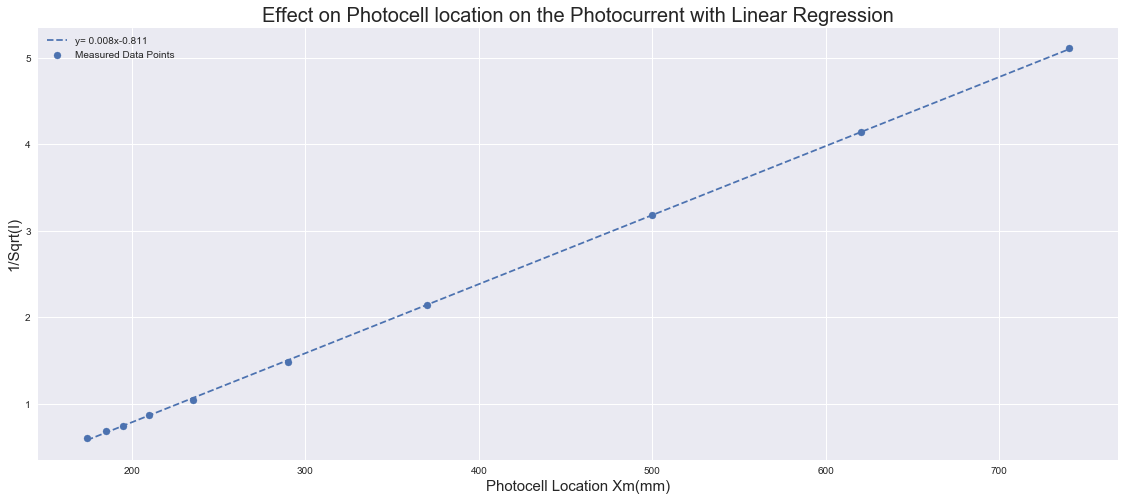

In [7]:
m,b,m_error,b_error=linearRegression(lightIn['Xm(mm)'].values,
                                     lightIn['1/Sqrt(I)'].values)

print("The slope is: ",str(m)," with error:",str(m_error))
print("The Intercept is: ",str(b)," with error:",str(b_error))

#make a plot with the line
fig2=plt.figure(figsize=(15,6))
ax=fig2.add_axes((0,0,1,1))

ax.scatter(lightIn['Xm(mm)'],lightIn['1/Sqrt(I)'],
           label="Measured Data Points")

ax.plot(lightIn['Xm(mm)'],lightIn['Xm(mm)'].values*m+b,
        label=str("y= "+str(round(m,3))+"x"+str(round(b,3))),
        linestyle='--')

ax.set_ylabel("1/Sqrt(I)",fontsize=15)
ax.set_xlabel("Photocell Location Xm(mm)",fontsize=15)
ax.legend(loc=2)
ax.set_title(("Effect on Photocell location on the "+
              "Photocurrent with Linear Regression")
             ,fontsize=20)

With this information we can find $x_{\text{offset}}$

In [8]:
x_offset=-1*b/m

x_offset_error=x_offset*np.sqrt((m_error/m)**2+(b_error/b)**2)

print("x_offset= "+str(round(x_offset))+"+-"+
      str(round(x_offset_error))+" mm")

x_offset= 102.0+-1.0 mm


With this value we can adjust our distance data and plot the graph again and then do another linear regression

In [9]:
#add a new column labeled r

lightIn['r (mm)']=lightIn['Xm(mm)']-x_offset
lightIn['1/r^2']=1/(lightIn['r (mm)']**2)
lightIn.head()

,Xm(mm),Photocurrent (10^-7 A),1/Sqrt(I),r (mm),1/r^2
0,174,2.750,0.603023,72.366742,0.000191
1,185,2.130,0.685189,83.366742,0.000144
2,195,1.830,0.739221,93.366742,0.000115
3,210,1.341,0.863546,108.366742,0.000085
4,235,0.913,1.046561,133.366742,0.000056


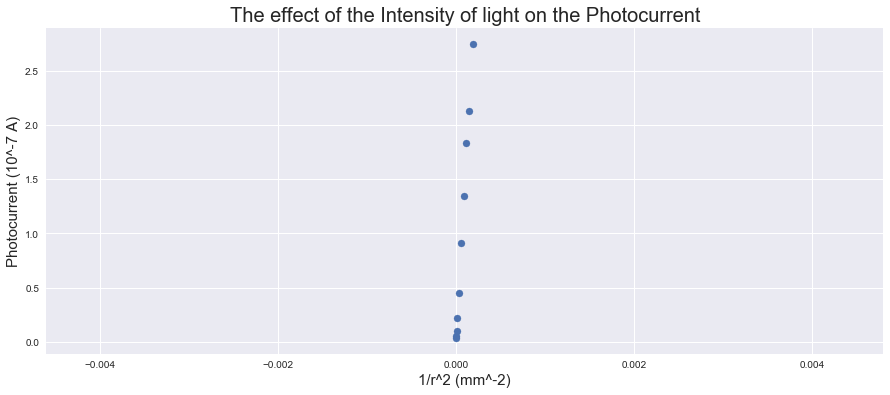

In [10]:
#Now we can plot i vs 1/r^2 
plt.figure(figsize=(15,6))
plt.scatter(lightIn['1/r^2'],lightIn['Photocurrent (10^-7 A)'])
plt.ylabel('Photocurrent (10^-7 A)',fontsize=15)
plt.xlabel("1/r^2 (mm^-2)",fontsize=15)
plt.title("The effect of the Intensity of light"+
          " on the Photocurrent",fontsize=20)



Here is a preliminary graph of the data. Next, I will do a linear regression on this data to see if there is a minimum intensity needed for the photoelectric effect to happen

In [11]:
m,b,m_error,b_error=linearRegression(
    lightIn['1/r^2'].values,lightIn['Photocurrent (10^-7 A)'].values)


x_int=-1*b/m

x_int_error=x_int*np.sqrt((m_error/m)**2+(b_error/b)**2)

print("x_intercept= "+str(round(x_int,1))+" mm with error "
      +str(round(x_int_error,2))+" mm")


print("The slope is: ",str(m)," with error:",str(m_error))
print("The y Intercept is: ",str(b)," with error:",str(b_error))

x_intercept= -0.0 mm with error -0.0 mm
The slope is:  14684.878799  with error: 271.345474844
The y Intercept is:  0.0353339584163  with error: 0.024538871


From the result above, it is clear that the the intercept represented by the data is indeed insignificant. This makes sense because an intensity of zero would mean no light would shine at all and thus there would be no interaction between a photon of light and an electron. Based on the slope of the line and the error associated with it, it is clear that there is a linear relationship between the intensity of light and the photocurrent. However, there is no minimum intensity needed to reach a current, this can be seen by the x-intercept shown above.This shows that photons interact with only one electron and as long as they have enough energy to excite the electron they interact with it will be excited. Based on the previous experiment and the data here it is clear that the direct relationship between the photocurrent and intensity is solely because of the increased number of interactions between electrons and photons. Without the concept of photons, we would be constrained to believe that light acts as waves, which would not be consistent with the findings since the data would have to show that a minimum intensity would need to be reached in order for the photoelectric effect to take place, therefore we would not be able to explain the outcome of this experiment.


A plot with the linear regression plotted on top can be seen below:

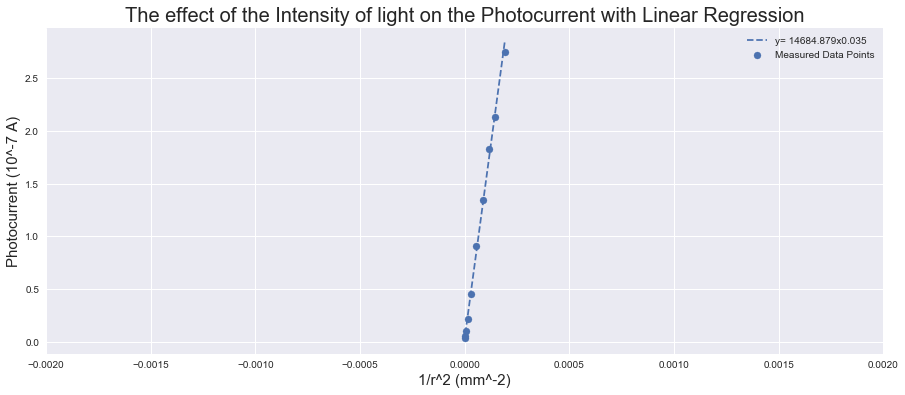

In [12]:
plt.figure(figsize=(15,6))

plt.scatter(lightIn['1/r^2'],lightIn['Photocurrent (10^-7 A)'],
            label='Measured Data Points')

plt.plot(lightIn['1/r^2'],m*lightIn['1/r^2'].values+b,
         label=str("y= "+str(round(m,3))+"x"+str(round(b,3))),ls='--')
plt.xlim([-0.002,0.002])
plt.ylabel('Photocurrent (10^-7 A)',fontsize=15)

plt.xlabel("1/r^2 (mm^-2)",fontsize=15)
plt.legend()
plt.title("The effect of the Intensity of light"+
          " on the Photocurrent with Linear Regression",fontsize=20)

# Stopping Potential versus Frequency

 Here we will be looking at the relationship between the stopping potential and the frequency of light. With this we can determine the work function and a value for $\frac{h}{e}$. For each color, the photocell was placed in the position that produced the maximum stopping potential. Each subsequent data point was taken after blocking the light for 30s-60s, allowing the voltage to equilibrate.

In [13]:
#import the data
waveStop=pd.read_excel(
    "StoppingVoltage-Wavelength Data 2020-03-19.xlsx",
                       skiprows=[0,1,2,3,4])

waveStop.columns=['Wavelength (nm)','Stopping Potential (V)','h']
waveStop.drop(labels=['h'],axis=1,inplace=True)


#make a frequency column
waveStop['frequency']=(299792458*10**9)/waveStop['Wavelength (nm)']








waveStop.head(20)

,Wavelength (nm),Stopping Potential (V),frequency
0,633.0,0.417,4.736058e+14
1,633.0,0.421,4.736058e+14
2,633.0,0.422,4.736058e+14
3,579.1,0.575,5.176869e+14
4,579.1,0.573,5.176869e+14
5,579.1,0.575,5.176869e+14
6,546.0,0.772,5.490704e+14
7,546.0,0.773,5.490704e+14
8,546.0,0.776,5.490704e+14
9,436.0,1.224,6.875974e+14


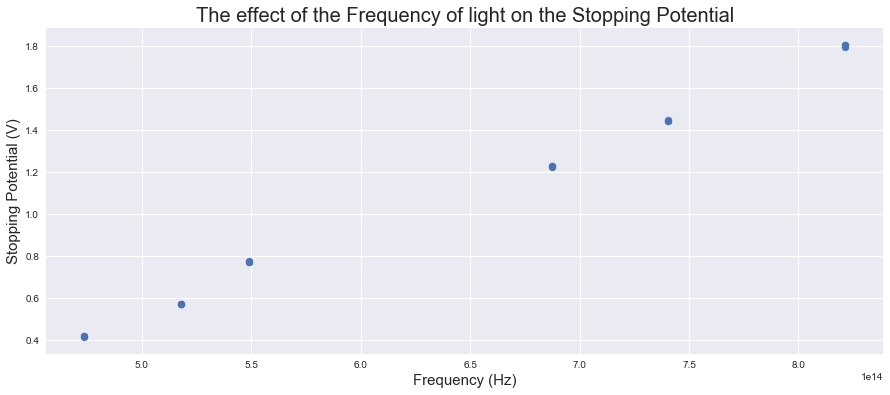

In [14]:
#plot this data
plt.figure(figsize=(15,6))
plt.scatter(waveStop['frequency'],waveStop['Stopping Potential (V)'])
plt.xlabel('Frequency (Hz)',fontsize=15)
plt.ylabel("Stopping Potential (V)",fontsize=15)
plt.title("The effect of the Frequency of light"+
          " on the Stopping Potential",fontsize=20)

Now do a linear regression on this data.


The slope is:  3.889249682933812e-15  with error: 5.62480147874e-17
The y Intercept is:  -1.4160209845278644  with error: 0.03622886738


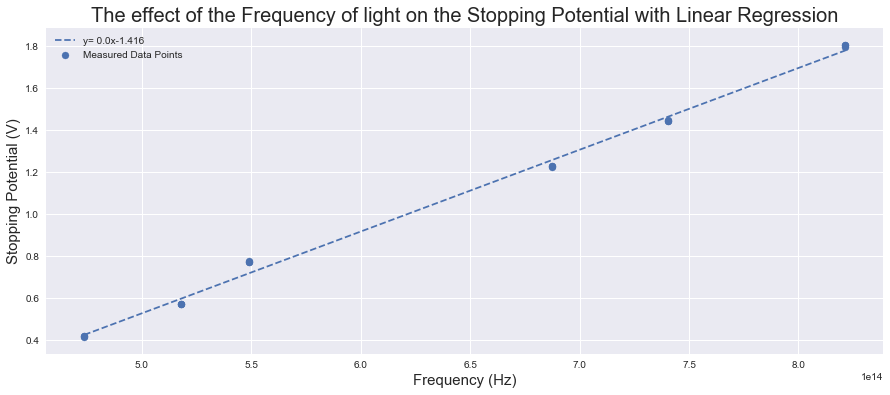

In [15]:
m,b,m_error,b_error=linearRegression(
    waveStop['frequency'],waveStop['Stopping Potential (V)'])

print("The slope is: ",str(m)," with error:",str(m_error))
print("The y Intercept is: ",str(b)," with error:",str(b_error))



#plot it with the trend line
plt.figure(figsize=(15,6))
plt.scatter(waveStop['frequency'],waveStop['Stopping Potential (V)'],label='Measured Data Points')

plt.plot(waveStop['frequency'],m*waveStop['frequency'].values+b,
         label=str("y= "+str(round(m,3))+"x"+str(round(b,3))),ls='--')

plt.legend()
plt.xlabel('Frequency (Hz)',fontsize=15)
plt.ylabel("Stopping Potential (V)",fontsize=15)
plt.title("The effect of the Frequency of light"+
          " on the Stopping Potential with Linear Regression",fontsize=20)


From this we can find the various values mentioned aboove. The frequency was calculated using the following equation.

\begin{equation}\label{eq:1}
\nu= \frac{c}{\lambda}
\end{equation}

With this we can use the stopping potential formula given in the lab handout below:
\begin{equation}\label{eq:2}
V_{\text{Stop}}=\frac{h}{e}\nu-\frac{\omega_0}{e}
\end{equation}

With this it is clear that $\frac{h}{e}=3.889 \pm 1.45\% \frac{Js}{C}$ If we multiply this value by $e=1.60217662 \times 10^{-19}$, we should get plank's constant. After this calculation we get that $h=6.231 \times 10^{-34}\pm 1.45\%$ Js which is very close to the actual value $6.62607015 \times 10^{-34}$J/Hz taken from https://physics.nist.gov/cgi-bin/cuu/Value?h.

We can now also find the work function by using the intercept,$\frac{\omega_0}{e}=1.4160 \pm 0.04$ V.


# Conclusion

From the results above, it is clear that the light acts like a wave in some circumstances and a particle in other circumstances. This discovery by Albert Einstein and Robert Millikan certainly deserved the nobel prize as it paved the way to the field of quantum mechanics and fundamentally changed our understanding of light.